In [1]:
%run fungsi_save.ipynb

In [2]:
#pilih data fitur masukan NN1
train_data = pd.read_csv('rev3_data_baru_norm_training.csv', sep=',',header=None)
train_data = train_data.values
post = pd.read_csv('data_feature2_pos.csv', sep=',',header=None)
post = np.int_(post)
total_features = np.size(train_data, axis=1)-3
print(total_features)
output_train_data = train_data[:,total_features+2] #output aja limfo
output_train_data = np.int_(output_train_data)
train_data = train_data[:,:total_features]
train_data

29


array([[0.23290321, 0.1880663 , 0.80561347, ..., 0.71176292, 0.29021789,
        0.405438  ],
       [0.33876336, 0.21701657, 0.88720096, ..., 0.71985131, 0.84939207,
        0.852632  ],
       [0.14477051, 0.07823204, 0.90193096, ..., 0.73730247, 0.72618649,
        0.593281  ],
       ...,
       [0.43478703, 0.29436464, 0.82699077, ..., 0.58111237, 0.78983127,
        0.965812  ],
       [0.43482695, 0.20640884, 0.95507519, ..., 0.58083608, 0.67863338,
        0.633993  ],
       [0.28595488, 0.25281768, 0.46894224, ..., 0.11345727, 0.17694923,
        0.561331  ]])

In [3]:
output_train_data

array([0, 1, 0, ..., 1, 0, 0])

In [4]:
np.size(train_data,axis=0)

1390

In [5]:
a = [] #index fitur yang gak kepake
for i in range(len(post)):
    if post[i,0] == 0:
        a.append(i)
a

[2, 5, 6, 11, 12, 14, 16, 19, 24]

In [6]:
train_data = np.delete(train_data, a ,axis=1) #data fitur yang udah terseleksi
print("Number of training samples is", len(train_data))
print(np.size(train_data,axis=1))
print(train_data[0])

Number of training samples is 1390
20
[0.23290321 0.1880663  0.46743473 0.45973021 0.17391968 0.28606383
 0.61069057 0.19392608 0.27244226 0.764981   0.59393149 0.61649561
 0.71176946 0.24770907 0.34098131 0.42035761 0.1609526  0.71176292
 0.29021789 0.405438  ]


In [7]:
#data validasi
validasi_data = pd.read_csv('rev3_data_baru_norm_testing.csv', sep=',',header=None)
validasi_data = validasi_data.values
output_validasi_data = validasi_data[:,total_features+2] #output aja untuk output 1
output_validasi_data = np.int_(output_validasi_data)
validasi_data = validasi_data[:,0:total_features] #fitur aja tanpa output dan fiturnya lengkap
validasi_data = np.delete(validasi_data, a ,axis=1) #data fitur yang udah terseleksi

#save_data1(test_data)

In [8]:
validasi_data.shape

(347, 20)

In [9]:
n_inputs = np.size(train_data,1)
n_hidden = 20
n_classes = 2
n_inputs

20

In [10]:
def forward_prop(params):

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = params[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = params[w1_total:b1_total].reshape((n_hidden,))
    W2 = params[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = params[w2_total:b2_total].reshape((n_classes,))

    # Perform forward propagation
    z1 = train_data.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1 #belum pasti pake fungsi aktivasi apa
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood #belum pasti loss functionnya pake apa
    N = len(train_data) # Number of samples
    corect_logprobs = -np.log(probs[range(N), output_train_data])
    loss = np.sum(corect_logprobs) / N
    return loss

In [11]:
def f(x):
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [12]:
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=1000) #fungsi verbose dan print step error


2021-03-31 21:43:53,469 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=0.239
2021-03-31 21:45:10,698 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.23876845000338762, best pos: [-3.51636717e-01  1.82534188e-01 -3.79847847e-01  1.25818170e-01
 -7.63315776e-01 -2.24715062e-01 -2.20985151e+00  5.74652966e-01
  8.27048694e-01  7.00590418e-01  3.96441164e-01 -3.58049261e-01
  7.80426921e-01 -8.39721766e-01 -1.03203166e+00 -2.42672708e-02
 -4.81006737e-01 -9.40393837e-01  7.86375888e-01  5.55582458e-01
 -5.33284446e-01  7.40880181e-01 -8.96708650e-02 -2.14047216e+00
 -7.85745769e-01 -4.23212327e-01 -2.51262186e-01 -5.58514723e-01
  3.22295551e-01  6.47781716e-01 -5.16907571e-01 -2.90923017e-01
  3.68180656e-01 -4.79669549e-01 -2.40883441e-01  8.04396719e-01
 -6.35682180e-01 -5.35473071e-02  3.56688

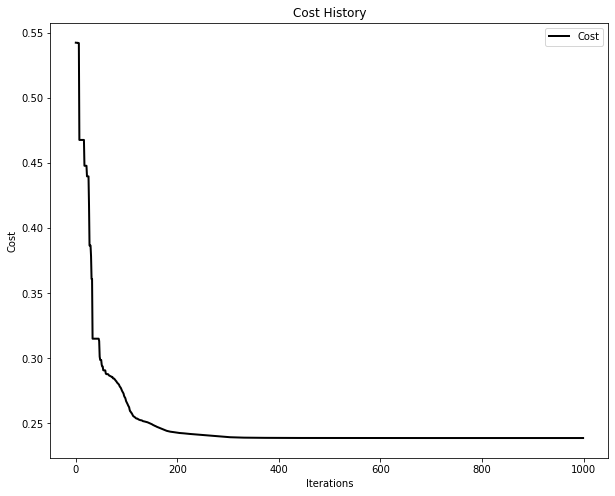

In [13]:
from pyswarms.utils.plotters import plot_cost_history
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [14]:
train_data.shape

(1390, 20)

In [15]:
np.savetxt('hyperparameter.csv', pos, delimiter=",")

In [16]:
#kurang test file
def predict(a, pos): #a = data training atau data test

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = pos[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = pos[w1_total:b1_total].reshape((n_hidden,))
    W2 = pos[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = pos[w2_total:b2_total].reshape((n_classes,))
    save_params2(W1,b1,W2,b2)
    # Perform forward propagation
    z1 = a.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # fungsi aktivasi belum fix
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [17]:
predict(validasi_data,pos)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [18]:
cm_train = confusion_matrix(output_train_data, predict(train_data, pos))
cm_validasi = confusion_matrix(output_validasi_data, predict(validasi_data, pos))
cm_train

array([[1013,   54],
       [  85,  238]], dtype=int64)

In [19]:
cm_validasi

array([[248,  28],
       [  8,  63]], dtype=int64)

Normalized confusion matrix
[[0.95 0.05]
 [0.26 0.74]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.11 0.89]]


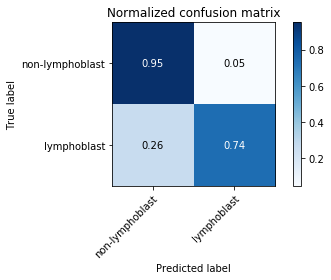

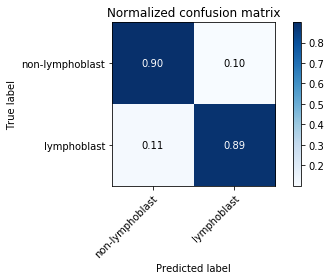

In [20]:
class_names = np.array(['non-lymphoblast',"lymphoblast"])
np.set_printoptions(precision=2)
cm_t = plot_confusion_matrix(output_train_data, predict(train_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
cm_v = plot_confusion_matrix(output_validasi_data, predict(validasi_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [21]:
cm_t.figure.savefig('rev3_train2.png')
cm_v.figure.savefig('rev3_validasi2.png')

In [22]:
predict(train_data, pos)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
predict(validasi_data, pos)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [24]:
#### data testing
data_test =  pd.read_csv('rev3_data_testing_NN1.csv', sep=',',header=None)
data_test = data_test.values
len_data_test = np.size(data_test, axis=1)-1
data_test[:,31]

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

In [25]:
output_test_data = data_test[:,31] #output aja limfo
output_test_data = np.int_(output_test_data)
output_test_data

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [26]:
data_test = data_test[:,:29]
data_test = np.delete(data_test, a ,axis=1) #data fitur yang udah terseleksi
#drop fitur
data_test

array([[0.52, 0.41, 0.69, ..., 0.75, 0.83, 0.88],
       [0.54, 0.29, 0.45, ..., 0.8 , 0.73, 0.75],
       [0.49, 0.32, 0.97, ..., 0.58, 0.58, 0.86],
       ...,
       [0.25, 0.14, 0.92, ..., 0.85, 0.69, 0.73],
       [0.23, 0.15, 0.19, ..., 0.63, 0.54, 0.59],
       [0.62, 0.32, 0.79, ..., 0.91, 0.91, 0.95]])

In [27]:
#cm_train = confusion_matrix(output_train_data, predict(train_data, pos))
#cm_validasi = confusion_matrix(output_validasi_data, predict(validasi_data, pos))
cm_test = confusion_matrix(output_test_data, predict(data_test, pos))
cm_test

array([[153,  23],
       [  7,  61]], dtype=int64)

Normalized confusion matrix
[[0.87 0.13]
 [0.1  0.9 ]]


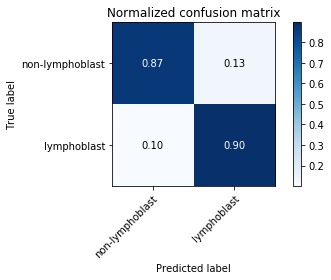

In [28]:
class_names = np.array(['non-lymphoblast',"lymphoblast"])
np.set_printoptions(precision=2)
cm_test2 = plot_confusion_matrix(output_test_data, predict(data_test, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [29]:
cm_test2.figure.savefig('rev3_test2.png')

In [30]:
output_test_data

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [31]:
print("Presisi data training limfoblas : ", precision(1,cm_train))
print("Recall data training limfoblas (sensitivitas) : ", recall(1,cm_train))
print("Presisi rerata data training : ", precision_macro_average(cm_train))
print("Presisi rerata data training : ", recall_macro_average(cm_train))
print("Akurasi data training : ", accuracy(cm_train))
print("F1 Score data training : ", f1_score(precision_macro_average(cm_train),recall_macro_average(cm_train)))

Presisi data training limfoblas :  0.815068493150685
Recall data training limfoblas (sensitivitas) :  0.7368421052631579
Presisi rerata data training :  0.8688275070489309
Presisi rerata data training :  0.8431164603166773
Akurasi data training :  0.9
F1 Score data training :  0.855778911381178


In [32]:
print("Presisi data validasi limfoblas : ", precision(1,cm_validasi))
print("Recall data validasi limfoblas : ", recall(1,cm_validasi))
print("Presisi rerata data validasi : ", precision_macro_average(cm_validasi))
print("Presisi rerata data validasi : ", recall_macro_average(cm_validasi))
print("Akurasi data validasi : ", accuracy(cm_validasi))
print("F1 Score data validasi : ", f1_score(precision_macro_average(cm_validasi),recall_macro_average(cm_validasi)))

Presisi data validasi limfoblas :  0.6923076923076923
Recall data validasi limfoblas :  0.8873239436619719
Presisi rerata data validasi :  0.8305288461538461
Presisi rerata data validasi :  0.8929373341498266
Akurasi data validasi :  0.8962536023054755
F1 Score data validasi :  0.8606031522921744


In [33]:
print("Presisi data test limfoblas : ", precision(1,cm_test))
print("Recall data test limfoblas : ", recall(1,cm_test))
print("Presisi rerata data test : ", precision_macro_average(cm_test))
print("Presisi rerata data test : ", recall_macro_average(cm_test))
print("Akurasi data test : ", accuracy(cm_test))
print("F1 Score data test : ", f1_score(precision_macro_average(cm_test),recall_macro_average(cm_test)))

Presisi data test limfoblas :  0.7261904761904762
Recall data test limfoblas :  0.8970588235294118
Presisi rerata data test :  0.841220238095238
Presisi rerata data test :  0.8831885026737968
Akurasi data test :  0.8770491803278688
F1 Score data test :  0.8616936633838818


In [34]:
pos2 = [i for i in pos]
pos2

[-0.3516367174353852,
 0.1825341884625991,
 -0.37984784741818867,
 0.12581817007797366,
 -0.7633157764375396,
 -0.22471506161500934,
 -2.2098515113303834,
 0.5746529660748363,
 0.8270486943360502,
 0.7005904179181339,
 0.3964411638371509,
 -0.35804926106024637,
 0.7804269214736982,
 -0.8397217664956078,
 -1.0320316579039086,
 -0.024267270819627106,
 -0.48100673650069103,
 -0.94039383665791,
 0.7863758875625105,
 0.5555824576058632,
 -0.5332844455326726,
 0.7408801813560796,
 -0.08967086502532513,
 -2.1404721599220715,
 -0.7857457688864818,
 -0.42321232726499525,
 -0.2512621855065405,
 -0.5585147227552725,
 0.32229555103006075,
 0.6477817159879429,
 -0.5169075711294818,
 -0.2909230169290561,
 0.3681806564822128,
 -0.4796695493959535,
 -0.2408834412723415,
 0.804396718984869,
 -0.6356821799674501,
 -0.053547307086319135,
 0.3566884782473403,
 -0.015818043452730562,
 -0.5907068736755704,
 0.6168701201467347,
 -0.16059133424633346,
 -0.3762075177599407,
 0.4701179206095387,
 0.651231516181

In [35]:
#save_pos_step1('neuron_step1.csv',(n_hidden,optimizer.cost_history,accuracy(cm_train),accuracy(cm_validasi)))
save_pos_step1('perfo_step2.csv',("1",accuracy(cm_train),accuracy(cm_validasi),accuracy(cm_test),pos2,optimizer.cost_history,post))